In [1]:
import pandas as pd
import imblearn as im
from numpy import mean

In [2]:
print(im.__version__)

0.9.0


In [3]:

# define undersample strategy
# majorit is used for undersampling
undersample = im.under_sampling.RandomUnderSampler(sampling_strategy=0.66)
undersample

RandomUnderSampler(sampling_strategy=0.66)

In [4]:
data = pd.read_csv('data/final/leaks.csv')
data.head()

,Unnamed: 0,entity,pagerank,tax,cpi_score,eigen,degree_centrality,labels
0,0,# 1 APPLIANCES SERVICE AND PARTS,0.245625,25.0,68.0,0.000215,0.0,0
1,1,# 1 CAR COOLING,0.320000,25.0,68.0,0.000422,0.0,0
2,2,#1 PAINT STORE,0.277500,25.0,68.0,0.000215,0.0,0
3,3,#17 GUNSITE INC.,0.277689,5.5,67.0,0.000422,0.0,0
4,4,$1.00 A DAY RENT-A-CAR LIMITED,0.150564,0.0,68.0,0.000215,0.0,0


In [5]:
X = data[["pagerank","degree_centrality","tax","cpi_score","eigen"]]
y=data['labels']
y.value_counts()

0    263652
1     16901
Name: labels, dtype: int64

In [6]:
X_over, y_over = undersample.fit_resample(X, y)
y_over.value_counts()

0    25607
1    16901
Name: labels, dtype: int64

#### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [9]:
clf = RandomForestClassifier(max_depth=4)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

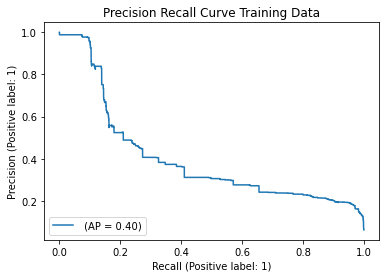

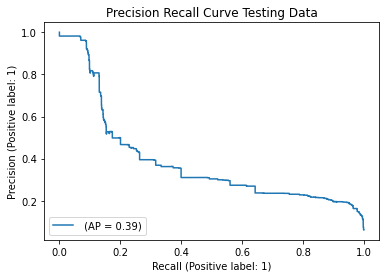

In [11]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf, X_train, y_train, name=""
)
_ = display.ax_.set_title("Precision Recall Curve Training Data")

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name=""
)
_ = display.ax_.set_title("Precision Recall Curve Testing Data")

In [12]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(clf, X_test, y_test, scoring='average_precision', cv=cv, n_jobs=-1)
# summarize performance
print('Average Precision score: %.5f' % mean(scores))

predictions = clf.predict(X_test)

Average Precision score: 0.38961


In [13]:
pred = clf.predict(X_test)

In [14]:
clf.score(X_test,y_test)

0.9443202315759913

In [15]:
roc_auc_score(y_test, pred)

0.5455166423442119

#### Logistic Regressor

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR = LogisticRegression(solver="lbfgs", max_iter=100)


In [18]:
LR.fit(X_train, y_train)

LogisticRegression()

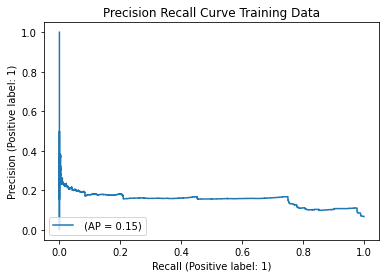

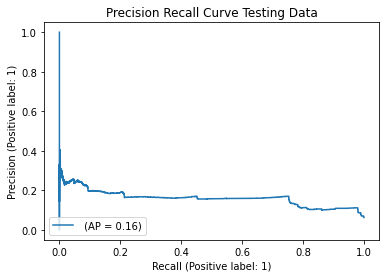

In [19]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    LR, X_train, y_train, name=""
)
_ = display.ax_.set_title("Precision Recall Curve Training Data")

display = PrecisionRecallDisplay.from_estimator(
    LR, X_test, y_test, name=""
)
_ = display.ax_.set_title("Precision Recall Curve Testing Data")

In [20]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(LR, X_test, y_test, scoring='average_precision', cv=cv, n_jobs=-1)
# summarize performance
print('Average Precision score: %.5f' % mean(scores))

predictions = LR.predict(X_test)

Average Precision score: 0.16197


In [21]:
predLR = LR.predict(X_test)

In [22]:
LR.score(X_test,y_test)

0.9392329045289092

In [23]:
roc_auc_score(y_test, predLR)

0.5

#### SVM

In [24]:
from sklearn import svm

In [25]:
S = svm.SVC()

In [26]:
S.fit(X_train, y_train)

SVC()

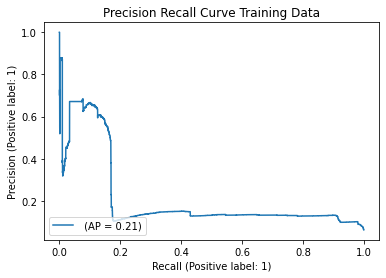

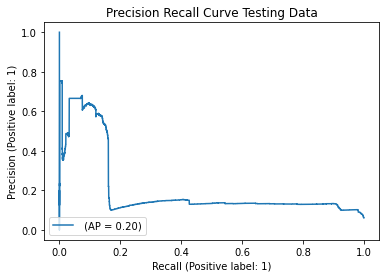

In [27]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    S, X_train, y_train, name=""
)
_ = display.ax_.set_title("Precision Recall Curve Training Data")

display = PrecisionRecallDisplay.from_estimator(
    S, X_test, y_test, name=""
)
_ = display.ax_.set_title("Precision Recall Curve Testing Data")

In [28]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(S, X_test, y_test, scoring='average_precision', cv=cv, n_jobs=-1)
# summarize performance
print('Average Precision score: %.5f' % mean(scores))

predictions = S.predict(X_test)

Average Precision score: 0.19401


In [29]:
predS = S.predict(X_test)

In [30]:
S.score(X_test,y_test)

0.9392329045289092

In [31]:
roc_auc_score(y_test, predS)

0.5

In [34]:
y_test.value_counts()/len(y_test)

0    0.939233
1    0.060767
Name: labels, dtype: float64